In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vijay\AppData\Local\Temp\ipykernel_1128\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [3]:
df = df.iloc[:, 3:]
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [5]:
df['Classes'] = np.where(df.Classes.str.contains('not fire'), 0, 1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [6]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [7]:
# Independent and dependent features
X = df.drop(columns=['FWI'])
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [8]:
y = df.FWI
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [9]:
# spliting the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [10]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [11]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.679075,-0.390305,-0.314034,0.680863,0.473480,0.352828,0.612571,0.444060,0.509785,0.319167
RH,-0.679075,1.000000,0.298149,0.235968,-0.637944,-0.384189,-0.185380,-0.663150,-0.322272,-0.421015,-0.416074
Ws,-0.390305,0.298149,1.000000,0.219014,-0.269477,-0.073448,0.007526,-0.043368,-0.043533,-0.146038,-0.204210
Rain,-0.314034,0.235968,0.219014,1.000000,-0.528773,-0.284261,-0.286047,-0.340628,-0.294556,-0.384665,-0.031671
FFMC,0.680863,-0.637944,-0.269477,-0.528773,1.000000,0.608669,0.485302,0.739012,0.591803,0.766842,0.220484
DMC,0.473480,-0.384189,-0.073448,-0.284261,0.608669,1.000000,0.859809,0.656075,0.979153,0.570214,0.224193
DC,0.352828,-0.185380,0.007526,-0.286047,0.485302,0.859809,1.000000,0.450276,0.932696,0.453344,-0.065357
ISI,0.612571,-0.663150,-0.043368,-0.340628,0.739012,0.656075,0.450276,1.000000,0.611016,0.736461,0.301981
BUI,0.444060,-0.322272,-0.043533,-0.294556,0.591803,0.979153,0.932696,0.611016,1.000000,0.562295,0.113420
Classes,0.509785,-0.421015,-0.146038,-0.384665,0.766842,0.570214,0.453344,0.736461,0.562295,1.000000,0.232802


<Axes: >

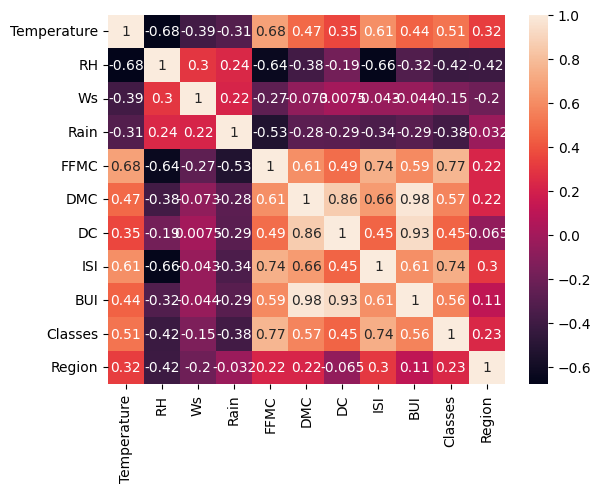

In [12]:
sns.heatmap(X_train.corr(), annot=True)

In [13]:
# Handling multicollinearity
def high_corr(dataset, threshold):
    corr_matrix = dataset.corr()
    high_corr_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_features.add(corr_matrix.columns[i])
    return set(high_corr_features)

In [14]:
high_corr_features = high_corr(X_train, 0.85)
high_corr_features

{'BUI', 'DC'}

In [15]:
# drop the high correlated features
X_train.drop(columns=list(high_corr_features), inplace=True)
X_test.drop(columns=list(high_corr_features), inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [16]:
# Feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear regression model

Mean absolute error:  0.7954779534689069
r2 score:  0.9829598208563046


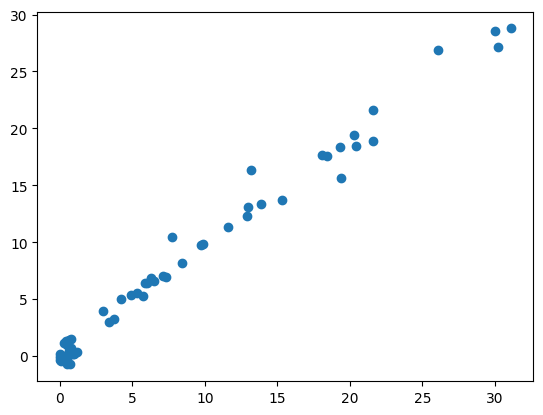

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

Mean absolute error:  1.5785178308487482
r2 score:  0.9374553946690878


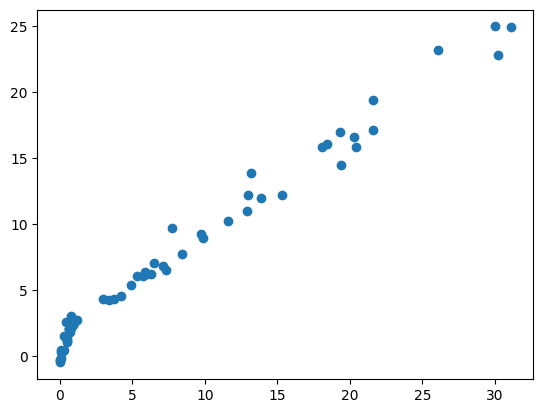

In [18]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

Mean absolute error:  1.5785178308487482
r2 score:  0.9374553946690878


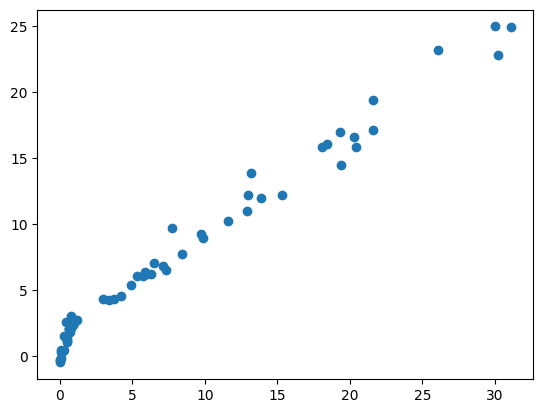

In [19]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

Mean absolute error:  0.8109931218063561
r2 score:  0.9822532699642176


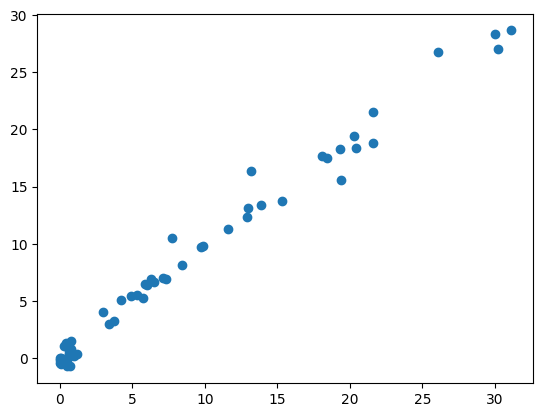

In [20]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

Mean absolute error:  0.8109931218063561
r2 score:  0.9822532699642176


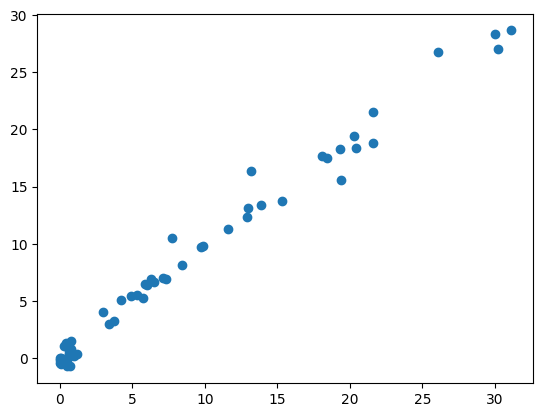

In [21]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

Mean absolute error:  2.255550351421716
r2 score:  0.8647114151295823


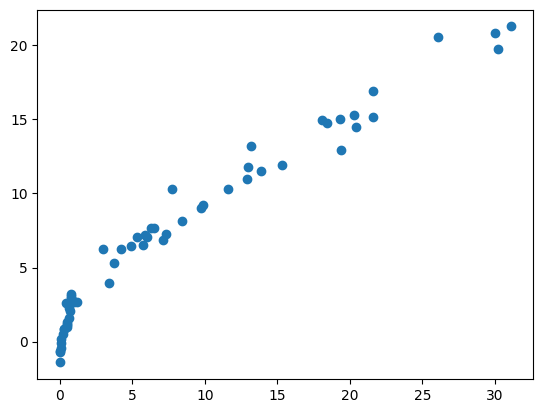

In [22]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

Mean absolute error:  0.8589803984759052
r2 score:  0.9796855472278512


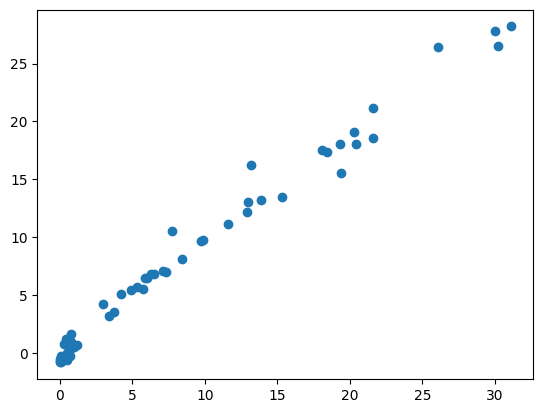

In [23]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV(cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("r2 score: ", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred)

In [25]:
# Model pickling
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(lassocv, open('lassocv.pkl', 'wb'))